## Prepare virtual machine on google colab
1. Connect to google drive
2. Install dependencies

In [1]:
#http://forums.fast.ai/t/quick-google-colab-setup-for-part-2-week-1-along-with-pascal-voc-dataset/13650
#https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d
!pip install https://github.com/fastai/fastai/archive/master.zip
!pip install opencv-python
!apt update && apt install -y libsm6 libxext6
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision

    100% |████████████████████████████████| 90.0MB 467kB/s 
    100% |████████████████████████████████| 1.5MB 7.5MB/s 
    100% |████████████████████████████████| 112kB 9.8MB/s 
    100% |████████████████████████████████| 174kB 8.8MB/s 
    100% |████████████████████████████████| 3.4MB 10.5MB/s 


    80% |█████████████████████████▋      | 398.1MB 28.0MB/s eta 0:00:04

    100% |████████████████████████████████| 496.4MB 30kB/s 
    100% |████████████████████████████████| 51kB 11.4MB/s 
    100% |████████████████████████████████| 61kB 12.7MB/s 
    100% |████████████████████████████████| 51kB 13.1MB/s 
    100% |████████████████████████████████| 2.2MB 12.5MB/s 
    100% |████████████████████████████████| 13.7MB 3.2MB/s 
    100% |████████████████████████████████| 92kB 19.2MB/s 
    100% |████████████████████████████████| 112kB 22.7MB/s 
    100% |████████████████████████████████| 71kB 14.0MB/s 


    100% |████████████████████████████████| 81kB 17.9MB/s 
  Running setup.py bdist_wheel for fastai ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-jtcq1rj4/wheels/64/3d/9f/d12a217aa2531321c5b9ae96288fcae2687d3b744376e8f94f
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in directory: /content/.cache/pip/wheels/86/a9/6b/36b727a9ec687dac08bd3d0501cddd7b1a223943513eb04a03
  

Get:1 http://security.ubuntu.com/ubuntu artful-security InRelease [83.2 kB]
Hit:2 http://archive.ubuntu.com/ubuntu artful InRelease
Get:3 http://archive.ubuntu.com/ubuntu artful-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu artful-backports InRelease [74.6 kB]
Get:5 http://security.ubuntu.com/ubuntu artful-security/universe Sources [20.5 kB]
Get:6 http://security.ubuntu.com/ubuntu artful-security/main amd64 Packages [222 kB]
Get:7 http://archive.ubuntu.com/ubuntu artful-updates/universe Sources [43.2 kB]
Get:8 http://security.ubuntu.com/ubuntu artful-security/multiverse amd64 Packages [1,815 B]
Get:9 http://security.ubuntu.com/ubuntu artful-security/universe amd64 Packages [78.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 Packages [348 kB]
Get:11 http://security.ubuntu.com/ubuntu artful-security/restricted amd64 Packages [2,933 B]
Get:12 http://archive.ubuntu.com/ubuntu artful-updates/universe amd64 Packages [141 kB]
Get:13 http://archive.

    100% |████████████████████████████████| 592.3MB 50.0MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: torch 0.3.1
    Uninstalling torch-0.3.1:
      Successfully uninstalled torch-0.3.1
    100% |████████████████████████████████| 2.0MB 7.3MB/s 
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [2]:
## Connect to google drive for storage 
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!mkdir -p drive
!google-drive-ocamlfuse drive

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [3]:
!pip install kaggle

  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/d6/3c/92/375decc0cf0a65b281db3cca9b8e21dc27b8ebc4d1ce29afca
Successfully built kaggle
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [12]:
## More dependencies
!pip install kaggle
!cp drive/kaggle.json /content/.kaggle/
!chmod 600 /content/.kaggle/kaggle.json

!apt-get install p7zip-full
#!pip install --no-cache-dir -I pillow

gpg: keybox '/tmp/tmp68ifa8nh/pubring.gpg' created
gpg: /tmp/tmp68ifa8nh/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


## Download kaggle data

In [0]:
!mkdir statoil

In [14]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/7380/train.json.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528001871&Signature=WjvWhHbXuwLlXd5G6RpKc4VTjWo%2BPg3aHaOlHEHmTVjuS0zsJ2v85JR1oEavgRjg1nv7cERyJKBinD6JV8ODmu9LgdzU%2BryQmZYm%2BjRkIMzKpvFGiicYPHuFGM7FQWK1vDM5E6JhTgIx6jPF41249HiuB1VguG9EMTb2ZYipYOOq9x%2FshWmR1i9%2BYBv9xPUyGBEpLChWV3ExClh1Z3uk5xydn0YIFQ5isZUe0G67MbVnxK3y4WoXeKjCCdlwsc3XE8tEbWOMzjD0NFpPU0h%2BtXSDLIkG%2B2qJWkldJA8XyxYWzetHpxBSnA920FyDoWw25xihize%2BB88GKPZWHRI5rA%3D%3D" -O "train.json.7z" -c
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/7380/test.json.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528001932&Signature=TtOEoGJ7rrmWcRV%2Bli1Fvd%2FHSu9%2BQOhKzwyOqD5Cg9%2FSI05URsc8jor5SMdgaeby6KybAr%2BTKkhRO0PMuxn7KLCu5Vk%2BwaCJePONo5AKYwVM9MQiwhKVzM8ognoM1QACDBiFC1%2BAHqueg2uFZ8ypKskujw1DE9zDmzOEF8sfBQsyGbYZceWrAlNXw9lGmyLZODKCrX%2BhvAWmtV7WBSKyLuXeqyBbDKKHeqhwyaZfBA1Lsikq6adbgl4Zf2UHgTsZzC5Zresx3%2Fa3BottmpuaKZq3AmovYbw078r1Fy8UHe79G4CEkzxlTVvrMXXIqD8o6hF3%2BgbugKII7mZvIR%2FR2Q%3D%3D" -O "test.json.7z" -c
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/7380/sample_submission.csv.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528001953&Signature=ELjhNcLCyMdFwrJoRpCrYdC39YGxuJzXjNktpytFasaU1MMlDfZcLMW3ReaUwixJBtMBsV3gEvYShCntvlbVBI3FB9dUxg4PBKOhKtztrSApbqEJRosyCxNs6E1EKlV5%2BCtclpFPt4P3Dw39j3mGgkNOT45y4tXsXsnI40sBhGrWXcqFwk9U08oApjk2HpHvmBdR50XdnPxHqgtiIEeKrSRzsvCVE%2B33vSgSF2AF4fbYlTBKlCOy2imtvf6vn16M%2B2YLcujl8A5%2BdYD9Qt0UtZEkn6b79v3zA8EWkfPhRmVM6uZfJwcygFF1%2BQQ%2FHhz772m%2Fkc%2BDbuGGcy5ItVxT1A%3D%3D" -O "sample_submission.csv.7z" -c

--2018-06-02 04:01:08--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/7380/train.json.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528001871&Signature=WjvWhHbXuwLlXd5G6RpKc4VTjWo%2BPg3aHaOlHEHmTVjuS0zsJ2v85JR1oEavgRjg1nv7cERyJKBinD6JV8ODmu9LgdzU%2BryQmZYm%2BjRkIMzKpvFGiicYPHuFGM7FQWK1vDM5E6JhTgIx6jPF41249HiuB1VguG9EMTb2ZYipYOOq9x%2FshWmR1i9%2BYBv9xPUyGBEpLChWV3ExClh1Z3uk5xydn0YIFQ5isZUe0G67MbVnxK3y4WoXeKjCCdlwsc3XE8tEbWOMzjD0NFpPU0h%2BtXSDLIkG%2B2qJWkldJA8XyxYWzetHpxBSnA920FyDoWw25xihize%2BB88GKPZWHRI5rA%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44932785 (43M) [application/x-7z-compressed]
Saving to: ‘train.json.7z’

train.json.7z       100%[===================>]  42.85M  97.1MB/s    in 0.4s    

2018-06-02 04:01:09 (97.1 MB/s) 

In [19]:
!7z x test.json.7z -ostatoil
!7z x train.json.7z -ostatoil
!7z x sample_submission.csv.7z -ostatoil
!ls statoil/data/processed


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 257127394 bytes (246 MiB)

Extracting archive: test.json.7z
--
Path = test.json.7z
Type = 7z
Physical Size = 257127394
Headers Size = 154
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      1% - data/processed/test.json                                 2% - data/processed/test.json                                 3% - data/processed/test.json                                 4% - data/processed/test.json                                 6% - data/processed/test.json

                                41% - data/processed/test.json                                42% - data/processed/test.json                                43% - data/processed/test.json                                44% - data/processed/test.json                                45% - data/processed/test.json                                46% - data/processed/test.json                                47% - data/processed/test.json                                49% - data/processed/test.json

                                84% - data/processed/test.json                                85% - data/processed/test.json                                86% - data/processed/test.json                                87% - data/processed/test.json                                88% - data/processed/test.json                                89% - data/processed/test.json                                90% - data/processed/test.json                                91% - data/processed/test.json

## Imports

In [0]:
%matplotlib inline
#%reload_ext autoreload
#%autoreload 2

# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from pathlib import Path
import json

## Explore Data

In [0]:
PATH = Path('statoil/data/processed/')

In [22]:
list(PATH.iterdir())

[PosixPath('statoil/data/processed/test.json'),
 PosixPath('statoil/data/processed/sample_submission.csv'),
 PosixPath('statoil/data/processed/train.json')]

In [0]:
trn_j = json.load((PATH/'train.json').open())

In [24]:
len(trn_j)

1604

The number of the training examples are 1604.

## Prepare dataset to the data loader format

* I need to prepare my data into the form expected by the dataloader. You need a train folder. The train folder is subdivided into two folders: ship, and iceberg. The ship contain all the training ships and the iceberg contains all the training iceberg. 
 
 
 1. train
 
 1.1 ship
 
 1.2 iceberg
 
 2. valid
 
 2.1 ship
 
 2.2 iceberg


In [0]:
!mkdir statoil/data/train
!mkdir statoil/data/valid
!mkdir statoil/data/train/ship
!mkdir statoil/data/train/iceberg
!mkdir statoil/data/valid/ship
!mkdir statoil/data/valid/iceberg

In [0]:
#split data into train and validation
valid_idxs = get_cv_idxs(len(json.load((PATH/'train.json').open())))

* For each example, I have two images: one taken horizontally and the other is taken vertically. Since I want to use transfer learning, I will merge the two images into one using the color_composite function. Doing so will enable me to use trained network such as resnet 34, resnet50, ...


In [0]:
def color_composite(row):
    band_1 = np.array(row['band_1']).reshape(75, 75)
    band_2 = np.array(row['band_2']).reshape(75, 75)
    band_3 = band_1 / band_2

    r = (band_1 + abs(band_1.min())) / np.max((band_1 + abs(band_1.min())))
    g = (band_2 + abs(band_2.min())) / np.max((band_2 + abs(band_2.min())))
    b = (band_3 + abs(band_3.min())) / np.max((band_3 + abs(band_3.min())))

    rgb = np.dstack((r, g, b))
    return np.array(rgb)


In [0]:
#work on the ships
trn_j_ship = [s for s in trn_j if s['is_iceberg']==0]

In [0]:
for i,row in enumerate(trn_j_ship):
  if i in valid_idxs:
    path = "statoil/data/valid/ship/"
  else:
    path = "statoil/data/train/ship/"
  #convert it to a single image
  img = color_composite(row)
  plt.imsave(path + row['id'] + '.jpg',  img)

In [0]:
trn_j_iceberg = [s for s in trn_j if s['is_iceberg']==1]
for i,row in enumerate(trn_j_iceberg):
  if i in valid_idxs:
    path = "statoil/data/valid/iceberg/"
  else:
    path = "statoil/data/train/iceberg/"
  #convert it to a single image
  img = color_composite(row)
  plt.imsave(path + row['id'] + '.jpg',  img)

In [34]:
import random
#k = np.random.choice(valid_idxs,replace=False)
k=1285#print(k)

1285


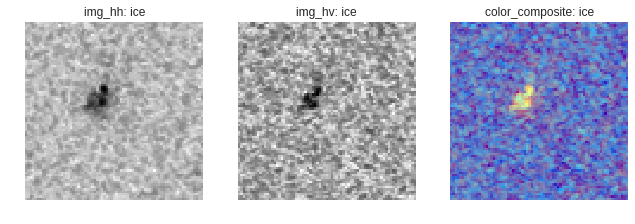

In [42]:
row = trn_j[k]
fig,ax = plt.subplots(1,3,figsize=(9,3))
ax[0].axis("off")
ax[0].imshow(np.array(row['band_1']).reshape(75,75))
ax[1].axis("off")
ax[1].imshow(np.array(row['band_2']).reshape(75,75))
ax[2].axis("off")
img = color_composite(row)
ax[2].imshow(img)
ax[0].set_title("img_hh: "+["ship" if row['is_iceberg']==0 else "ice"][0])
ax[1].set_title("img_hv: "+["ship" if row['is_iceberg']==0 else "ice"][0])
ax[2].set_title("color_composite: "+["ship" if row['is_iceberg']==0 else "ice"][0])

fig.tight_layout()
plt.show()

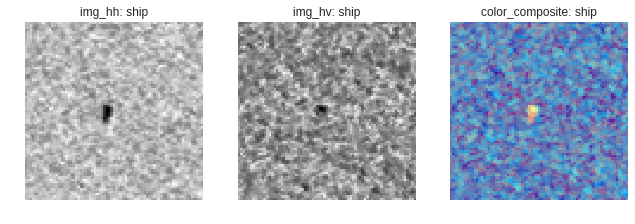

In [45]:
#k = np.random.choice(valid_idxs,replace=False)
k=432#print(k)
row = trn_j[k]
fig,ax = plt.subplots(1,3,figsize=(9,3))
ax[0].axis("off")
ax[0].imshow(np.array(row['band_1']).reshape(75,75))
ax[1].axis("off")
ax[1].imshow(np.array(row['band_2']).reshape(75,75))
ax[2].axis("off")
img = color_composite(row)
ax[2].imshow(img)
ax[0].set_title("img_hh: "+["ship" if row['is_iceberg']==0 else "ice"][0])
ax[1].set_title("img_hv: "+["ship" if row['is_iceberg']==0 else "ice"][0])
ax[2].set_title("color_composite: "+["ship" if row['is_iceberg']==0 else "ice"][0])

fig.tight_layout()
plt.show()

## Model

In [0]:
PATH = "statoil/data/"
sz = 75

In [46]:
!ls {PATH}

processed  train  valid


In [47]:
!ls {PATH}"/valid"

iceberg  ship


In [49]:
files = !ls {PATH}"/valid/iceberg" | head
files

['010355ab.jpg',
 '02530ece.jpg',
 '025f1df9.jpg',
 '038b8949.jpg',
 '0615d2f8.jpg',
 '0b1d356b.jpg',
 '0c954027.jpg',
 '0d179546.jpg',
 '0d42590b.jpg',
 '0f467f8a.jpg']

In [52]:
%matplotlib inline
!pip install --no-cache-dir -I pillow

    100% |████████████████████████████████| 2.0MB 22.9MB/s 
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [58]:
!pip install Pillow==4.0.0
!pip install PIL
!pip install image
import PIL.image

    100% |████████████████████████████████| 5.6MB 8.3MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: Pillow 5.1.0
    Uninstalling Pillow-5.1.0:
      Successfully uninstalled Pillow-5.1.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
    100% |████████████████████████████████| 7.1MB 5.0MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


ModuleNotFoundError: ignored

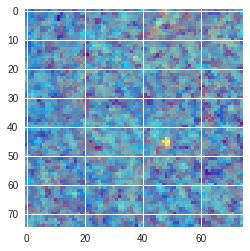

In [61]:
img= plt.imread(f"{PATH}/valid/iceberg/{files[0]}")
plt.imshow(img)

# Model 1

In [0]:
PATH = "statoil/data/"
arch = resnet34
sz = 75
bs= 32

In [0]:
def get_data(sz,bs,arch):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down,max_zoom=1.1)
    data = ImageClassifierData.from_paths(PATH,tfms=tfms,bs=bs)
    return data

In [0]:
data = get_data(sz,bs,arch)

In [0]:
learn = ConvLearner.pretrained(arch,data,precompute=True)

In [93]:
learn.lr_find()

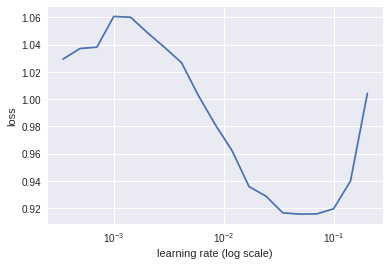

In [94]:
learn.sched.plot()

Here we find the learning rateby gradually increasing the learning rate very batch and then looking for the learning rate that produces the highes drop in loss. After examing the plot, I decided to go with a learning rate of .05. 

In [0]:
lr=.001

We start with weights initialized according to resnet34. Here, we only train the last layer for 3 cycles. The rest of the layers are frozen. 

In [96]:
learn = ConvLearner.pretrained(arch,data,precompute=True)
learn.fit(lr,3)

epoch      trn_loss   val_loss   accuracy   
    0      0.727125   0.499632   0.724719  
    1      0.602717   0.459231   0.741573  
    2      0.55705    0.435864   0.780899  


[array([0.43586]), 0.7808988764044944]

Next, we set precompute to false, so the data augmentation can be applied. Earlier, the data augmentation was off.

In [0]:
learn.precompute = False

In [98]:
learn.fit(lr,3)

epoch      trn_loss   val_loss   accuracy   
    0      0.567161   0.5504     0.733146  
    1      0.534135   0.499347   0.758427  
    2      0.523355   0.501866   0.75      


[array([0.50187]), 0.75]

In [0]:
learn.save("resnet_75")
learn.load("resnet_75")

Noticing that the training loss is larger than the validation loss, we conclude that the model is slightly under fitting. Hence, I use a cycle_mult of 2 so that the learning rate can drop over a wider span. 

In [100]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.502761   0.497943   0.752809  
    1      0.489068   0.474238   0.761236  
    2      0.499411   0.46797    0.761236  


[array([0.46797]), 0.7612359550561798]

In [0]:
learn.save("resnet_75")
learn.load("resnet_75")

In [0]:
learn.load("resnet_75")

In [106]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.631522   0.512      0.75      
    1      0.553665   0.403084   0.792135  
    2      0.494061   0.395826   0.808989  


[array([0.39583]), 0.8089887640449438]

In [0]:
learn.save("resnet_75")
learn.load("resnet_75")

In [108]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.4587     0.38503    0.792135  
    1      0.440939   0.350682   0.839888  
    2      0.391352   0.335259   0.842697  


[array([0.33526]), 0.8426966292134831]

In [0]:
learn.save("resnet_75")
learn.load("resnet_75")

In [110]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.373838   0.328077   0.837079  
    1      0.347101   0.301747   0.859551  
    2      0.337252   0.296993   0.86236   


[array([0.29699]), 0.8623595505617978]

In [0]:
learn.save("resnet_75")
learn.load("resnet_75")

In [112]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.316154   0.295782   0.853933  
    1      0.332214   0.279258   0.86236   
    2      0.301349   0.277461   0.876404  


[array([0.27746]), 0.8764044943820225]

In [0]:
learn.save("resnet_75")
learn.load("resnet_75")

In [114]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.335879   0.282272   0.859551  
    1      0.300889   0.269656   0.879213  
    2      0.298801   0.262621   0.88764   


[array([0.26262]), 0.8876404494382022]

In [0]:
learn.save("resnet_75")
learn.load("resnet_75")

In [116]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.298039   0.265001   0.882022  
    1      0.296105   0.264539   0.890449  
    2      0.285095   0.269063   0.890449  


[array([0.26906]), 0.8904494382022472]

In [0]:
learn.save("resnet_75")
learn.load("resnet_75")

In [120]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2) #run this line several time until trn_loss, val_loss are close

epoch      trn_loss   val_loss   accuracy   
    0      0.267696   0.260255   0.88764   
    1      0.265057   0.250151   0.890449  
    2      0.268823   0.252278   0.896067  


[array([0.25228]), 0.8960674157303371]

In [0]:
learn.save("resnet_75")
learn.load("resnet_75")

Now, we will train all the weights of the network. We want to have minimum training on the earlier group of layers of resnet 34. Those layers are responsible for detecting edges and patterns and hence would need minimal changes. The later groups of layers of renet 34 will need more learning. To achive this we set a seperate learning rate for each group of layers as so:

In [0]:
learn.unfreeze()

We again find the learning rate that will produce the highest drop in loss. The optimum learning rate might change after training the model for some epochs. 

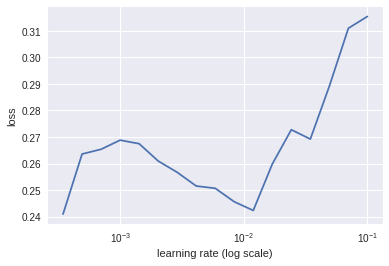

In [124]:
learn.lr_find()
learn.sched.plot()

In [0]:
lr = .0002

In [0]:
lrs = [lr/100,lr/10,lr]

In [131]:
learn.fit(lrs,2,cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.25812    0.248666   0.893258  
    1      0.247662   0.249945   0.893258  


[array([0.24995]), 0.8932584269662921]

In [0]:
learn.save("resnet_75")
learn.load("resnet_75")

In [0]:
learn.load("resnet_75")

To push the accuracy higher, we use test time augmentation (TTA).

In [137]:
log_preds,y = learn.TTA()

In [0]:
preds = np.mean(np.exp(log_preds),0)

In [139]:
accuracy_np(preds,y)

0.901685393258427

On the validation dataset, I achieved a score of 90.2%.

# Kaggle submission

In [0]:
!mkdir statoil/data/test/

In [0]:
PATH2 = Path('statoil/data/processed/')
test_j = json.load((PATH2/'test.json').open())

In [0]:
for i,row in enumerate(test_j):
  path = "statoil/data/test/"
  #convert it to a single image
  img = color_composite(row)
  plt.imsave(path + row['id'] + '.jpg',  img)

In [0]:
def get_data(sz,bs,arch):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down,max_zoom=1.1)
    data = ImageClassifierData.from_paths(PATH,tfms=tfms,bs=bs,test_name='test')
    return data
data = get_data(sz,bs,arch)
learn.set_data(data)

In [193]:
log_preds2, y  = learn.TTA(is_test=True)

In [0]:
preds2 = np.mean(np.exp(log_preds2),0)

In [198]:
accuracy_np(preds2,y)

0.22542735042735043

In [0]:
log_preds = learn.predict(is_test=True)

In [199]:
preds = np.exp(log_preds)
accuracy_np(preds,y)

0.24537037037037038

In [213]:
# getting ids from test list
id_raw = data.test_dl.dataset.fnames
id_raw[0].split('/')[1].split('.')[0]

'18da6fdd'

In [0]:
id = [i.split('/')[1].split('.')[0] for i in id_raw]

In [0]:
p = preds[:,0]

In [0]:
df1 = pd.DataFrame(list(zip(id,p)),columns=['id','is_iceberg'])

In [235]:
df1.head()

,id,is_iceberg
0,18da6fdd,0.051501
1,186ea788,0.569364
2,6d32e09b,0.627088
3,bfc86919,0.046794
4,119fd1ca,0.001412


In [0]:
df = pd.read_csv("statoil/data/processed/sample_submission.csv")

In [243]:
df.head()

,id,is_iceberg
0,5941774d,0.5
1,4023181e,0.5
2,b20200e4,0.5
3,e7f018bb,0.5
4,4371c8c3,0.5


In [250]:
del df["is_iceberg"]
df.head()

,id
0,5941774d
1,4023181e
2,b20200e4
3,e7f018bb
4,4371c8c3


In [251]:
df2=pd.merge(df, df1, on='id')
df2.head()

,id,is_iceberg
0,5941774d,0.106683
1,4023181e,0.081189
2,b20200e4,0.009249
3,e7f018bb,0.968823
4,4371c8c3,0.094619


In [0]:
fileName = 'submission1.csv'
message = 'Your message goes here'
df2.to_csv(fileName, index=False, header=True)

In [262]:
!kaggle competitions submit -c statoil-iceberg-classifier-challenge -f {fileName} -m "Message"

Successfully submitted to Statoil/C-CORE Iceberg Classifier Challenge

In [258]:
!kaggle competitions submit -c statoil-iceberg-classifier-challenge -f {fileName} -m {message}

usage: kaggle [-h] [-v] {competitions,c,datasets,d,config} ...
kaggle: error: unrecognized arguments: message goes here


In [260]:
pd.read_csv(fileName)

,id,is_iceberg
0,5941774d,0.106683
1,4023181e,0.081189
2,b20200e4,0.009249
3,e7f018bb,0.968823
4,4371c8c3,0.094619
5,a8d9b1fd,0.736344
6,29e7727e,0.291773
7,92a51ffb,0.998656
8,c769ac97,0.010491
9,aee0547d,0.012559
